# Sigma profile generator

In [10]:
from numpy import *
import numpy as np
import random
import re
import sys
from matplotlib import pyplot as plt
import os          
au_to_A = double(1.8897259885789)
reff = 0.5
sp=np.zeros((2,51))
aream=[[],[]]
aa=[]
def SGaverager (fileName0,fileName1):
    '''
        Import the file you want to process, then give you the cosmo volume, cosmo area, and averaged sigma profile. Export to sigma profiles folder.
    
    '''
    global count
    count = int(0)

    #open cosmo data file
    for fileName in (fileName0,fileName1):
        
        f = open(fileName)
        #read through each line in the file
        lines = f.readlines()
        lenth = len(lines)
        data_lines = f.readlines(69)
        # search cosmo 'area' and 'volume' in the file then convert unit to A
        f.close
        posxl, posyl, poszl, chargel,areal,sigmal,potentl, rad= [],[],[],[],[],[],[],[]
        
        for i in range (lenth):

            # find total number of segments
            if 'total number of segments' in lines[i]:
                num_segments = re.findall(r"\d+\.?\d*",lines[i])
                num_segments = int(num_segments[0])

            if 'Surface area' in lines[i]:

                #extract numbers from two lines
                cosmo_area = re.findall(r"\d+\.?\d*",lines[i])
                cosmo_volume = re.findall(r"\d+\.?\d*",lines[i+1])
                #convert to A unit
                cosmo_area,cosmo_volume = float(cosmo_area[0])/(float(au_to_A)**2),float(cosmo_volume[0])/(float(au_to_A**3))
                aa.append(cosmo_area)
                break
                
                
        #split all data into 7 columes
        for i in range(lenth-num_segments,lenth):
            line_data = re.findall(r"\-?\d+\.?\d*",lines[i])
            resultsl = posx, posy, posz, charge, area, sigma, potent= double(line_data[2:])
            # make 7 lists containing data
            posxl.append(posx/au_to_A )
            posyl.append(posy/au_to_A)
            poszl.append(posz/au_to_A)
            chargel.append(charge)
            areal.append(area/au_to_A**2)
            sigmal.append(sigma*au_to_A**2)
            potentl.append(potent)
            rad.append(sqrt(area/np.pi))
        print('The file',fileName,'is processing.')
        
        
        global sigmanew
        dmn,sigmasum,normsum,sigmanew,normdist = np.zeros(num_segments),np.zeros(num_segments),np.zeros(num_segments),np.zeros(num_segments),np.zeros(num_segments)
        for i in range(num_segments):
            for j in range(num_segments):
                dmn[j] = sqrt((posxl[j]-posxl[i])**2+(posyl[j]-posyl[i])**2+ (poszl[j]-poszl[i])**2)
                sigmasum[j]= sigmal[j]*(rad[j]**2*reff**2)/(rad[j]**2+reff**2)* np.exp(-(dmn[j]**2)/(rad[j]**2+reff**2))
                normdist[j] =((rad[j]**2*reff**2)/(rad[j]**2+reff**2))*np.exp(-(dmn[j]**2)/(rad[j]**2+reff**2))
                normsum[i] = normsum[i] + normdist[j]
                sigmanew[i] = sigmanew[i] + sigmasum[j]
            sigmanew[i] = sigmanew[i]/normsum[i]
        
        # sp is 2 * 51 array contains sigma profiles of two molecule
        global chgden
        chgden=np.zeros(51)
        for i in range(51):
            chgden[i]=-0.025 + 0.001*(i)
        #sigma profile sorting taken from lin dissertation
        for i in range(num_segments):
            tmp = int((sigmanew[i]-chgden[0])/double(0.001))
            sp[count][tmp] = sp[count][tmp] + areal[i]*(chgden[tmp+1]-sigmanew[i])/double(0.001)
            sp[count][tmp+1] = sp[count][tmp+1] + areal[i]*(sigmanew[i]-chgden[tmp])/double(0.001)
    
        aream[count] = areal
        count = count +1
        
    sps=(sp[0]*aa[0]+sp[1]*aa[1])/sum(aa)
    plt.plot(chgden,sps)
    plt.show()
    plt.xlabel('$σ [e/(A²)]$')
    plt.ylabel('$P^x (σ)$')
    
    if not os.path.exists('./sigma profiles') :
        os.mkdir('./sigma profiles')
    savingtxtmsg = open('./sigma profiles/{}'.format(fileName0+fileName1), 'a')
    for i in range(50):
        savingtxtmsg.write('{} {}'.format('%.3f' % chgden[i],'%.3f' %sps[i]))
        savingtxtmsg.write('\n')
    savingtxtmsg.close()
    print('Congratulations! Your sigma profile has been generated. simga profile saved in sigma profiles folder')

        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<THIS IS THE END OF AVERAGNG PART.<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        
    #>>>>>>>>>>    

The file MMIM.txt is processing.
The file Cl.txt is processing.


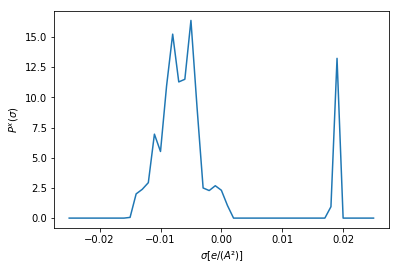

Congratulations! Your sigma profile has been generated. simga profile saved in sigma profiles folder


In [11]:
SGaverager('MMIM.txt','Cl.txt')

# Net Charge determination

In [12]:
sps=(sp[0]*aa[0]+sp[1]*aa[1])/sum(aa)
number_of_segments_by_its_charge = chgden * sps
sum_number_of_segments_by_its_charge = sum(number_of_segments_by_its_charge)
sum_number_of_segments = sum(sps)
net_charge = (-1)*sum_number_of_segments_by_its_charge/sum_number_of_segments
print(net_charge)

0.00384670980170784
